# 개인프로젝트 

사용 데이터 : 서울일자리센터 인재정보 직종별, 지역별 목록.csv

주제 : 서울일자리센터 인재정보를 활용하여 데이터 전처리과 기초통계량 분석 및 시각화 진행 - 서울시를 중심으로
## #01. 데이터 불러오기 
### 필요한 패키지 설치


In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel
from IPython.display import SVG
from bs4 import BeautifulSoup
import requests
import seaborn as sb
import numpy as np
import sys
import os

### 데이터 불러오기 

In [2]:
df = pd.read_csv("서울일자리센터 인재정보 직종별, 지역별 목록.csv",encoding="euc-kr")


## #02. 데이터 확인

In [3]:
df

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H117202307112815,남,62,J00110,대학_대학교,서울,강동구,서울,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,30:57.0,31:00.0
1,H117202307112803,남,66,J00104,중학교,경기,하남시,서울,강동구,542002,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,25:47.0,25:52.0
2,H117202307112802,남,63,J00106,고등학교,경기,고양시,서울,NaN,542002,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,20:50.0,20:56.0
3,H117202307112790,남,68,J00110,대학_대학교,서울,강동구,서울,송파구,542002,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,12:26.0,12:33.0
4,H117202307112771,남,68,J00106,고등학교,서울,강동구,서울,송파구,26301,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,07:38.0,07:42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,H311202304201914,여,69,J00106,고등학교,서울,노원구,서울,강남구,561101,...,17년0월,J03404,알선,"건물청소, 학교. 병원.","새벽, 병원.",NaN,NaN,NaN,11:46.0,29:07.0
623,H324202304181331,여,64,J00104,중학교,서울,송파구,서울,전체,550104,...,5년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,33:58.0,01:57.0
624,H001202304180959,여,58,J00110,대학_대학교,서울,관악구,서울,영등포구,231100,...,1년3월,J03404,알선,NaN,NaN,NaN,NaN,NaN,44:22.0,46:53.0
625,H321202304141385,여,63,J00106,고등학교,서울,관악구,서울,전체,232901,...,신입,J03404,알선,NaN,NaN,NaN,NaN,NaN,13:19.0,29:37.0


In [4]:
df.dtypes

구직신청번호             object
성별                 object
나이                  int64
학력공통코드             object
학력공통코드명            object
희망근무지역(시도)_1       object
희망근무지역명(시군구)_1     object
희망근무지역명(시도)_2      object
희망근무지역명(시군구)_2     object
희망직종공통코드            int64
희망직종공통코드명          object
희망직종경력년수          float64
희망직종경력년_월수         object
구직인증상태공통구분         object
구직인증상태공통구분명        object
검색키워드1             object
검색키워드2             object
검색키워드3             object
검색키워드4             object
검색키워드5             object
등록일시               object
수정일시               object
dtype: object

## #03. 데이터 전처리

### 1. 필요없는 변수 제거 

In [5]:

## 분석에 필요없는 희망직종경력년_월수, 구직인증상태공통구분 , 구직인증상태공통구분명, 검색키워드, 등록,수정일시
## + 희망직종공통코드  제거 + 학력 공통코드 제거 

df= df.iloc[:,:-9]
df = df.drop(columns=["희망직종공통코드","학력공통코드"])


In [6]:
## 희망근무지역은 1순위만 따지기 위해 2순위 칼럼 제거 
df = df.drop(columns=["희망근무지역명(시도)_2","희망근무지역명(시군구)_2"])
df

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력년_월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,NaN,신입
1,H117202307112803,남,66,중학교,경기,하남시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
2,H117202307112802,남,63,고등학교,경기,고양시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,NaN,신입
...,...,...,...,...,...,...,...,...,...
622,H311202304201914,여,69,고등학교,서울,노원구,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",17.0,17년0월
623,H324202304181331,여,64,중학교,서울,송파구,재가 요양보호사,5.0,5년0월
624,H001202304180959,여,58,대학_대학교,서울,관악구,사회복지사,1.0,1년3월
625,H321202304141385,여,63,고등학교,서울,관악구,노인 생활지도원,0.0,신입


### 2. 데이터 정제


#### 희망근무지역 값 정리

In [7]:
## 서울시를 중심으로 분석할 예정이기 떄문에 희망근무지역이 서울인 지역만 추출 
df['희망근무지역(시도)_1'].unique()

df = df.loc[df['희망근무지역(시도)_1']=="서울",:]
df['희망근무지역(시도)_1'].unique()
df



,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력년_월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,NaN,신입
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,NaN,신입
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,NaN,신입
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,NaN,신입
...,...,...,...,...,...,...,...,...,...
622,H311202304201914,여,69,고등학교,서울,노원구,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",17.0,17년0월
623,H324202304181331,여,64,중학교,서울,송파구,재가 요양보호사,5.0,5년0월
624,H001202304180959,여,58,대학_대학교,서울,관악구,사회복지사,1.0,1년3월
625,H321202304141385,여,63,고등학교,서울,관악구,노인 생활지도원,0.0,신입


####  파생변수 추가 :희망직종경력개월수 

In [8]:

df.loc[df['희망직종경력년_월수']!= "신입","희망직종경력년_월수"].str[-2].astype(int)
df['희망직종경력개월수'] = df.loc[df['희망직종경력년_월수']!= "신입","희망직종경력년수"] * 12 + df.loc[df['희망직종경력년_월수']!= "신입","희망직종경력년_월수"].str[-2].astype(int)
df

C:\Users\hamin\AppData\Local\Temp\ipykernel_19240\4245466422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['희망직종경력개월수'] = df.loc[df['희망직종경력년_월수']!= "신입","희망직종경력년수"] * 12 + df.loc[df['희망직종경력년_월수']!= "신입","희망직종경력년_월수"].str[-2].astype(int)


,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력년_월수,희망직종경력개월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,NaN,신입,NaN
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입,NaN
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,NaN,신입,NaN
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,NaN,신입,NaN
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,NaN,신입,NaN
...,...,...,...,...,...,...,...,...,...,...
622,H311202304201914,여,69,고등학교,서울,노원구,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",17.0,17년0월,204.0
623,H324202304181331,여,64,중학교,서울,송파구,재가 요양보호사,5.0,5년0월,60.0
624,H001202304180959,여,58,대학_대학교,서울,관악구,사회복지사,1.0,1년3월,15.0
625,H321202304141385,여,63,고등학교,서울,관악구,노인 생활지도원,0.0,신입,NaN



### 2. 데이터 정제

#### 희망근무지역 


##### 희망직종경력년_월수

In [9]:
## 희망직종경력년수 칼럼이 있기 떄문에 희망직종경력년_월수 칼럼을 신입과 경력으로 구분하고 칼럼이름 바꿈

df.loc[df['희망직종경력년_월수']!="신입","희망직종경력년_월수"] = "경력"
df = df.rename(columns={"희망직종경력년_월수": "희망직종경력유무"})
df.value_counts("희망직종경력유무")



희망직종경력유무
경력    337
신입    266
Name: count, dtype: int64

#### 파생변수 추가 : 희망직종경력 범주화

In [10]:
## 희망직종경력 범주화
df['희망직종경력(범주화)']  = df['희망직종경력년수']

df.loc[df['희망직종경력년수']<=10,'희망직종경력(범주화)'] = "0~10년이하"

df.loc[(df['희망직종경력년수']<=20)&(df['희망직종경력년수']>10),'희망직종경력(범주화)'] = "10~20년이하"

df.loc[(df['희망직종경력년수']>20),'희망직종경력(범주화)'] = "20년초과"

### 2. 데이터 정제 
### (1) 결측치 처리

In [11]:
df

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수,희망직종경력(범주화)
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,NaN,신입,NaN,NaN
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입,NaN,NaN
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,NaN,신입,NaN,NaN
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,NaN,신입,NaN,NaN
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,NaN,신입,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
622,H311202304201914,여,69,고등학교,서울,노원구,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",17.0,경력,204.0,10~20년이하
623,H324202304181331,여,64,중학교,서울,송파구,재가 요양보호사,5.0,경력,60.0,0~10년이하
624,H001202304180959,여,58,대학_대학교,서울,관악구,사회복지사,1.0,경력,15.0,0~10년이하
625,H321202304141385,여,63,고등학교,서울,관악구,노인 생활지도원,0.0,신입,NaN,0~10년이하


In [12]:
## 결측치 확인 
df.isnull().sum()



구직신청번호              0
성별                  0
나이                  0
학력공통코드명             0
희망근무지역(시도)_1        0
희망근무지역명(시군구)_1     68
희망직종공통코드명           0
희망직종경력년수          247
희망직종경력유무            0
희망직종경력개월수         266
희망직종경력(범주화)       247
dtype: int64

In [20]:
## 희망직종경력년수의 결측치 확인 
df[df['희망직종경력년수'].isnull()]
## 희망직종 경력이 결측치인 경우에는 희망직종 경력년_월수가 신입인 경우임.


,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수,희망직종경력(범주화)
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,NaN,신입,NaN,NaN
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입,NaN,NaN
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,NaN,신입,NaN,NaN
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,NaN,신입,NaN,NaN
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,NaN,신입,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
572,H322202307051420,남,44,고등학교,서울,서초구,경비원(건물 관리원),NaN,신입,NaN,NaN
580,H001202306282863,남,64,전문대학,서울,NaN,기타 전기?전자 기기 설치?수리원,NaN,신입,NaN,NaN
598,H320202306142175,남,60,대학_대학교,서울,동작구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입,NaN,NaN
612,H325202305300855,여,50,고등학교,서울,강동구,사무 보조원(일반사업체),NaN,신입,NaN,NaN


In [21]:
## 경력년수와 개월수는 신입의 경우 0이기 떄문에 결측치를 0으로 대체 
df['희망직종경력년수']=df['희망직종경력년수'].fillna(value = 0)
df['희망직종경력개월수']=df['희망직종경력개월수'].fillna(value = 0)
## 범주화된 변수의 경우도 마찬가지로 0~10년이하의 값으로 결측치를 대체 
df['희망직종경력(범주화)']=df['희망직종경력(범주화)'].fillna(value = "0~10년이하")

df.isnull().sum()

구직신청번호             0
성별                 0
나이                 0
학력공통코드명            0
희망근무지역(시도)_1       0
희망근무지역명(시군구)_1    68
희망직종공통코드명          0
희망직종경력년수           0
희망직종경력유무           0
희망직종경력개월수          0
희망직종경력(범주화)        0
dtype: int64

In [22]:
## 희망근무지역 결측치 제거 
### 희망 근무지역의 결측치 행은 임의로 값을 추가하기엔 어렵다고 판단해서 희망근무지역의 결측치는 제거하기로 판단

df = df.dropna()
df.isnull().sum()

구직신청번호            0
성별                0
나이                0
학력공통코드명           0
희망근무지역(시도)_1      0
희망근무지역명(시군구)_1    0
희망직종공통코드명         0
희망직종경력년수          0
희망직종경력유무          0
희망직종경력개월수         0
희망직종경력(범주화)       0
dtype: int64

### (2) 파생변수 추가 

### (4) 이상치 정제
#### 이상치 존재여부 확인
- 박스상자 그림을 활용한 이상치 존재여부 확인

In [23]:
# 그래프 전역설정
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

# 데이터 타입 확인 -> 경력년수와 나이 칼럼에 대해 이상치 존재여부 확인
df.dtypes

구직신청번호             object
성별                 object
나이                  int64
학력공통코드명            object
희망근무지역(시도)_1       object
희망근무지역명(시군구)_1     object
희망직종공통코드명          object
희망직종경력년수          float64
희망직종경력유무           object
희망직종경력개월수         float64
희망직종경력(범주화)        object
dtype: object

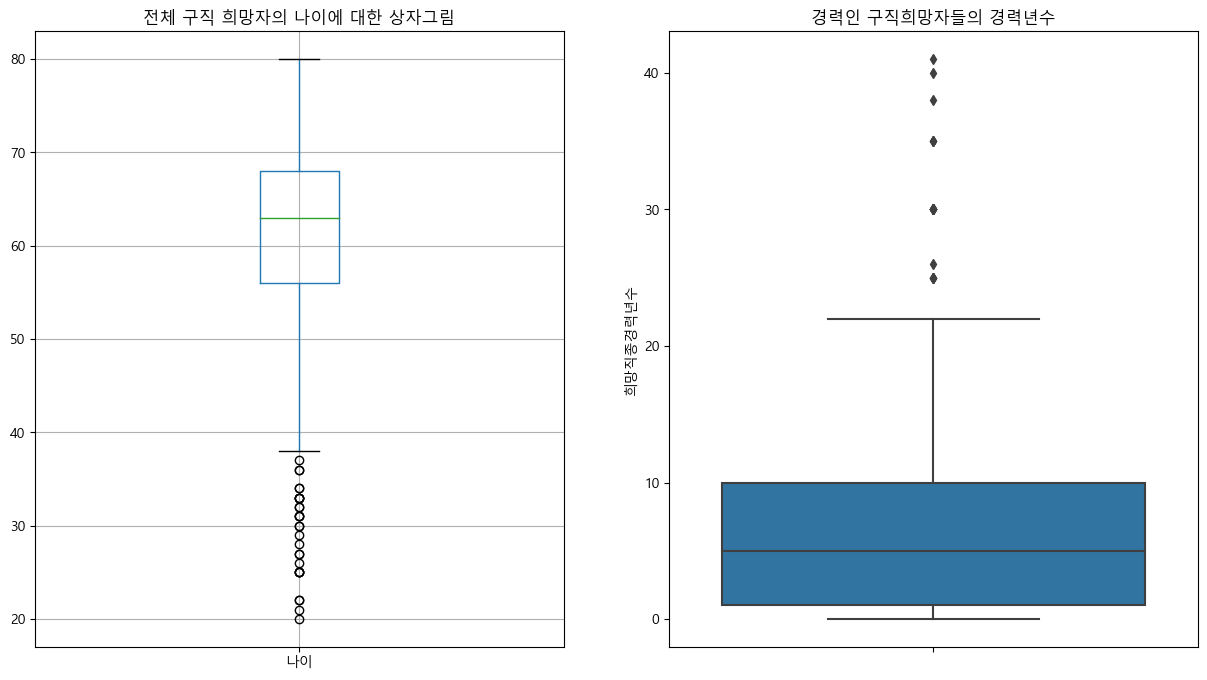

In [24]:
# 서브플롯을 활용한 상자그림 확인
fig, ax = plt.subplots(1,2,figsize=(15,8))
df.boxplot(['나이'],ax=ax[0])
ax[0].set_title("전체 구직 희망자의 나이에 대한 상자그림")

## 신입의 경우 경력이 0 밖에 없기떄문에 경력이 있는사람을 기준으로 박스상자 확인
sb.boxplot(data=df[df['희망직종경력유무']=="경력"],y="희망직종경력년수",ax=ax[1])
ax[1].set_title("경력인 구직희망자들의 경력년수")
plt.show()
plt.close()
## 이상치 존재 확인 

#### 이상치 정제 (1)
- 나이변수

In [25]:
## 이상치의 경계값
age_Q1 = df['나이'].quantile(0.25)
age_Q3 = df['나이'].quantile(0.75)

age_IQR = age_Q3 - age_Q1

age_low = age_Q1 - 1.5 * age_IQR

print("나이에 대한 하한은 %f" % age_low)
print("-"*35)
age_high = age_Q3 + 1.5 * age_IQR
print("나이에 대한 상한은 %f" % age_high)

## 이상치 확인
df[df['나이']<=age_low]
age_low_length = len(df[df['나이']<=age_low])

df[df['나이']<=age_low]
age_high_length = len(df[df['나이']>=age_high])

age_length = age_low_length + age_high_length
print("-"*35)
print("나이 변수의 이상치의 길이 :  ",age_length)

# 데이터에 적용

## 나이 변수 적용
print("이상치 제거 전 데이터 길이 : ",len(df))
df = df[(df['나이']>age_low)&(df['나이']<age_high)]

print('-'*30)
print("나이 변수 이상치 제거 후 데이터 길이 : ",len(df))

나이에 대한 하한은 38.000000
-----------------------------------
나이에 대한 상한은 86.000000
-----------------------------------
나이 변수의 이상치의 길이 :   31
이상치 제거 전 데이터 길이 :  535
------------------------------
나이 변수 이상치 제거 후 데이터 길이 :  504


In [28]:
df['희망직종경력개월수'].unique()

array([  0.,  72.,  96.,  12.,  24.,   5.,  18., 360., 181.,  36., 120.,
        60., 240.,   1.,  14.,   4.,  84.,  48.,  75., 420.,  64.,   6.,
       492., 108., 180., 132.,   3., 168., 123., 228.,  13.,  62.,  74.,
       144., 105., 156., 300., 266., 252.,  27.,  17., 216.,   9., 456.,
        50., 185.,  61.,  51.,  30.,  40.,   2.,  16.,  26.,  55.,  42.,
       309.,   8., 480., 312., 122., 204.,  15.])

#### 이상치 정제(2) 
- 희망직종경력년수

In [29]:
## 경력이 있는데도 개월수가 0 -> 이상치라고 판단하고 제거  
cond = (df['희망직종경력유무']=='경력') &  (df['희망직종경력개월수']==0)
df = df[~cond]


## 이상치의 경계값
year_Q1 = df[df['희망직종경력유무']=="경력"]['희망직종경력년수'].quantile(0.25)
year_Q3 = df[df['희망직종경력유무']=="경력"]['희망직종경력년수'].quantile(0.75)

year_IQR = year_Q3 - year_Q1

outlier_low = year_Q1 - 1.5 * year_IQR
outlier_high = year_Q3 + 1.5 * year_IQR
print("희망직종경력년수에 대한 하한은 %f" % outlier_low)
print("-"*35)

print("희망직종경력년수에 대한 상한은 %f" % outlier_high)
df[(df['희망직종경력유무']=="경력")&(df['희망직종경력년수']<=outlier_low)]
# ## 이상치 확인
year_low_length = len(df[(df['희망직종경력유무']=="경력")&(df['희망직종경력년수']<=outlier_low)])

year_high_length = len(df[(df['희망직종경력유무']=="경력")&(df['희망직종경력년수']>=outlier_high)])

year_length = year_low_length + year_high_length

print("-"*35)
print("희망직종경력년수 변수 이상치의 길이 :  ",year_length)
print("-"*35)
print("희망직종경력년수 이상치 제거 전 길이 :  ",len(df))
# 데이터에 적용
cond_high = df['희망직종경력년수']<=outlier_high
cond_low = df['희망직종경력년수']>=outlier_low
## 이상치 조건 적용
df.loc[df["희망직종경력유무"]=="경력","희망직종경력년수"] = df[cond_high & cond_low ]
## 이상치 값들이 na값으로 변함
df['희망직종경력년수'].unique()
# ## 이상치 제거 
df['희망직종경력년수'].isna().sum()
df = df.dropna(axis=0)
print("희망직종경력년수 이상치 제거 후 데이터 길이 : ",len(df))



희망직종경력년수에 대한 하한은 -11.875000
-----------------------------------
희망직종경력년수에 대한 상한은 23.125000
-----------------------------------
희망직종경력년수 변수 이상치의 길이 :   20
-----------------------------------
희망직종경력년수 이상치 제거 전 길이 :   504
희망직종경력년수 이상치 제거 후 데이터 길이 :  484


###  최종 데이터 확인 .

In [33]:
df.isnull().sum()

구직신청번호            0
성별                0
나이                0
학력공통코드명           0
희망근무지역(시도)_1      0
희망근무지역명(시군구)_1    0
희망직종공통코드명         0
희망직종경력년수          0
희망직종경력유무          0
희망직종경력개월수         0
희망직종경력(범주화)       0
dtype: int64

In [34]:
df.dtypes


구직신청번호             object
성별                 object
나이                  int64
학력공통코드명            object
희망근무지역(시도)_1       object
희망근무지역명(시군구)_1     object
희망직종공통코드명          object
희망직종경력년수          float64
희망직종경력유무           object
희망직종경력개월수         float64
희망직종경력(범주화)        object
dtype: object

In [22]:
df.isnull().sum()

구직신청번호            0
성별                0
나이                0
학력공통코드명           0
희망근무지역(시도)_1      0
희망근무지역명(시군구)_1    0
희망직종공통코드명         0
희망직종경력년수          0
희망직종경력유무          0
희망직종경력개월수         0
희망직종경력(범주화)       0
dtype: int64

## #04. 데이터 재구조화 

### 1. 데이터 집계

In [23]:
## 데이터 확인 
df.head(5)

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수,희망직종경력(범주화)
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0,0~10년이하
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0,0~10년이하
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0,0~10년이하
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0,0~10년이하
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0,0~10년이하


### (1) 피벗테이블을 이용한 평균나이 확인
        - 구직희망자들의 나이의 평균을 희망근무지역과 성별 따라 집계

In [24]:
pivot_df = pd.pivot_table(df,index="희망근무지역명(시군구)_1",columns="성별",values="나이")
pivot_df

성별,남,여
희망근무지역명(시군구)_1,,
강남구,63.428571,56.500000
강동구,67.700000,60.133333
강북구,61.500000,61.125000
강서구,66.222222,61.285714
관악구,58.222222,61.571429
광진구,64.888889,63.000000
구로구,65.357143,60.266667
금천구,60.833333,59.000000
노원구,68.000000,59.214286


### (2) 교차표를 이용한 데이터 비율 확인
    - 구직희망자들의 성별에 따른 경력유무의 비율을 집계

In [25]:
crosstab_df = pd.crosstab(index=df['성별'],columns=df['희망직종경력유무'],colnames=['경력유무'],rownames=['성별'],normalize=True,margins=True)

crosstab_df

경력유무,경력,신입,All
성별,,,
남,0.198238,0.237885,0.436123
여,0.348018,0.215859,0.563877
All,0.546256,0.453744,1.000000


### (3) GroupBy를 활용한 집계
    - 학력에 따른 구직자들의 나이에 대한 집계
    

In [36]:
group_df = df.filter(['학력공통코드명','나이']).groupby("학력공통코드명").agg(['min','max','median','mean'])
group_df

나이                      
        min max median       mean
학력공통코드명                          
고등학교     39  80   63.0  61.913636
관계없음     55  80   65.0  66.583333
대학_대학교   40  77   59.0  58.535211
무학력      59  68   64.0  63.750000
박사과정     66  66   66.0  66.000000
석사과정     56  66   64.0  63.000000
전문대학     40  72   56.5  55.607143
중학교      51  76   65.0  64.980583
초등학교     56  79   67.0  67.900000

In [50]:
worked_df= df.loc[df['희망직종경력유무']=="경력",].filter(['학력공통코드명','희망직종경력개월수'])
group_df2 = worked_df.groupby("학력공통코드명").agg(['min','max','median','mean'])
group_df2

희망직종경력개월수                          
              min    max median        mean
학력공통코드명                                    
고등학교          1.0  252.0   60.0   74.484127
관계없음         48.0  240.0  120.0  117.600000
대학_대학교        3.0  266.0   54.0   85.700000
무학력         180.0  180.0  180.0  180.000000
박사과정         48.0   48.0   48.0   48.000000
석사과정         12.0  120.0   12.0   48.000000
전문대학          1.0  216.0   60.0   68.300000
중학교           3.0  240.0   60.0   68.869565
초등학교          9.0  156.0   48.0   63.000000

## #05. 기술통계량
### 1. 데이터 확인

In [27]:
df.head(5)

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수,희망직종경력(범주화)
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0,0~10년이하
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0,0~10년이하
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0,0~10년이하
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0,0~10년이하
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0,0~10년이하


In [28]:
df.dtypes

구직신청번호             object
성별                 object
나이                  int64
학력공통코드명            object
희망근무지역(시도)_1       object
희망근무지역명(시군구)_1     object
희망직종공통코드명          object
희망직종경력년수          float64
희망직종경력유무           object
희망직종경력개월수         float64
희망직종경력(범주화)        object
dtype: object

### 2. 연속형 변수 통계량 
#### (1) 나이 칼럼의 기술통계량

In [51]:
## 최대 최소값
max_age = df['나이'].max()
min_age = df['나이'].min()

print("구직 희망자의 나이의 범위는 {min_age}세 ~ {max_age}세 입니다.".format(max_age=max_age,min_age=min_age))
## 평균값
mean_age = round(df['나이'].mean(),2)
print("구직 희망자의 나이의 평균은 {mean_age}세 입니다.".format(mean_age=mean_age))

## 중앙값
median_age = round(df['나이'].median(),2)
print("구직 희망자의 나이의 중앙값 {median_age}세 입니다.".format(median_age=median_age))
print("-"*30)
## 통계량의 일괄 확인
df['나이'].describe()

구직 희망자의 나이의 범위는 39세 ~ 80세 입니다.
구직 희망자의 나이의 평균은 62.35세 입니다.
구직 희망자의 나이의 중앙값 63.0세 입니다.
------------------------------


count    484.000000
mean      62.351240
std        8.022005
min       39.000000
25%       58.000000
50%       63.000000
75%       68.000000
max       80.000000
Name: 나이, dtype: float64

### (2) 희망직종경력년수 변수의 기술통계량

In [30]:

## 신입의 경우 경력이 0년이기 때문에 경력이 있는 사람들을 기준으로 따로 집계
worked_df = df.loc[df['희망직종경력유무']=='경력']


## 최대 최소 
max_year = worked_df.loc[df['희망직종경력유무']=='경력','희망직종경력년수'].max()
min_year= worked_df.loc[df['희망직종경력유무']=='경력','희망직종경력년수'].min()

print("경력의 범위는 {min_year}년 ~ {max_year}년 입니다.".format(min_year=min_year,max_year=max_year))

## 평균 
mean_year = worked_df['희망직종경력년수'].mean()

print("경력의 평균은 {mean_year}년 입니다.".format(mean_year=round(mean_year,2)))

## 중앙값

median_year = worked_df['희망직종경력년수'].median()

print("경력의 평균은 {median_year}년 입니다.".format(median_year=round(median_year,2)))

## 통계량의 일괄확인

worked_df['희망직종경력년수'].describe()

경력의 범위는 1.0년 ~ 20.0년 입니다.
경력의 평균은 6.62년 입니다.
경력의 평균은 5.0년 입니다.


count    248.000000
mean       6.625000
std        5.296139
min        1.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       20.000000
Name: 희망직종경력년수, dtype: float64

### 명목형 변수의 기술통계량 확인


In [52]:
df.head()

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수,희망직종경력(범주화)
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0,0~10년이하
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0,0~10년이하
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0,0~10년이하
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0,0~10년이하
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0,0~10년이하


In [60]:
## 명목형 변수의 기술통계량 확인 

print("<구직 희망자들의 성비>")
print(df["성별"].value_counts())
print("")
print("-"*30)
print("")
print("<학력에 따른 빈도수 확인>")
print(df["학력공통코드명"].value_counts())






<구직 희망자들의 성비>
성별
여    277
남    207
Name: count, dtype: int64

------------------------------

<학력에 따른 빈도수 확인>
학력공통코드명
고등학교      220
중학교       103
대학_대학교     71
초등학교       40
전문대학       28
관계없음       12
석사과정        5
무학력         4
박사과정        1
Name: count, dtype: int64


In [62]:

print("-"*30)
print("<희망직종에 따른 빈도수 확인>")
print(df["희망직종공통코드명"].value_counts())
print("-"*30)


------------------------------
<희망직종에 따른 빈도수 확인>
희망직종공통코드명
재가 요양보호사                           104
건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)     85
건물 경비원(청사,학교,병원,상가,빌딩,공장 등)         40
청소원                                 24
아파트?빌라 경비원                          15
                                  ... 
영업?판매 관리자                            1
국어 강사                                1
원예작물 재배원                             1
전기용접원(아크,알곤,티그용접원)                   1
노인 생활지도원                             1
Name: count, Length: 99, dtype: int64
------------------------------


In [63]:

print("<희망직종에 경력 따른 빈도수 확인>")
print(df["희망직종경력(범주화)"].value_counts())


<희망직종에 경력 따른 빈도수 확인>
희망직종경력(범주화)
0~10년이하     445
10~20년이하     37
20년초과         2
Name: count, dtype: int64


## #06. 데이터 시각화 및 분포 확인 
### 1. 데이터 확인

In [31]:
df.head()

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수,희망직종경력(범주화)
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0,0~10년이하
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0,0~10년이하
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0,0~10년이하
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0,0~10년이하
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0,0~10년이하


#### 그래프 전역설정

In [64]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

### 3. 도수분포표 작성

#### 나이변수

In [65]:
# numpy를 통한 도수수분포 조회
hist,bins = np.histogram(df['나이'],bins=5)
print(hist) ## 도수
print(bins) ## 구간

## 조회 결과를 도수분포표로 생성
info = []
for i,v in enumerate(hist):
    if i+1 < len(hist) :
        tpl = "%d 이상 %d 미만"
    else :
        tpl = "%d 이상 %d 미만"
    cls = tpl % (bins[i],bins[i+1])
    
    line = {"계급": cls,"도수" : v}
    info.append(line)

hist_df = pd.DataFrame(info)
hist_df.set_index("계급",inplace=True)
hist_df
## 상대도수 계산 

total_count = len(df)

hist_df['상대도수'] = hist_df['도수']/total_count

hist_df

[ 28  64 161 178  53]
[39.  47.2 55.4 63.6 71.8 80. ]


,도수,상대도수
계급,,
39 이상 47 미만,28,0.057851
47 이상 55 미만,64,0.132231
55 이상 63 미만,161,0.332645
63 이상 71 미만,178,0.367769
71 이상 80 미만,53,0.109504


#### 희망직종경력년수

In [67]:
# numpy를 통한 도수수분포 조회
hist2,bins2 = np.histogram(df.loc[df['희망직종경력유무']=="경력",'희망직종경력년수'],bins=5)
print(hist2) ## 도수
print(bins2) ## 구간

## 조회 결과를 도수분포표로 생성
info2 = []
for i,v in enumerate(hist2):
    if i+1 < len(hist2) :
        tpl = "%d 이상 %d 미만"
    else :
        tpl = "%d 이상 %d 미만"
    cls = tpl % (bins2[i],bins2[i+1])
    
    line = {"계급": cls,"도수" : v}
    info2.append(line)

hist_df2 = pd.DataFrame(info2)
hist_df2.set_index("계급",inplace=True)
hist_df2
## 상대도수 계산 

total_count = len(df)

hist_df2['상대도수'] = hist_df2['도수']/total_count

hist_df2

[134  64  48  13  19]
[ 0.   4.4  8.8 13.2 17.6 22. ]


,도수,상대도수
계급,,
0 이상 4 미만,134,0.276860
4 이상 8 미만,64,0.132231
8 이상 13 미만,48,0.099174
13 이상 17 미만,13,0.026860
17 이상 22 미만,19,0.039256


### 4. 히스토그램
#### 히스토그램 작성

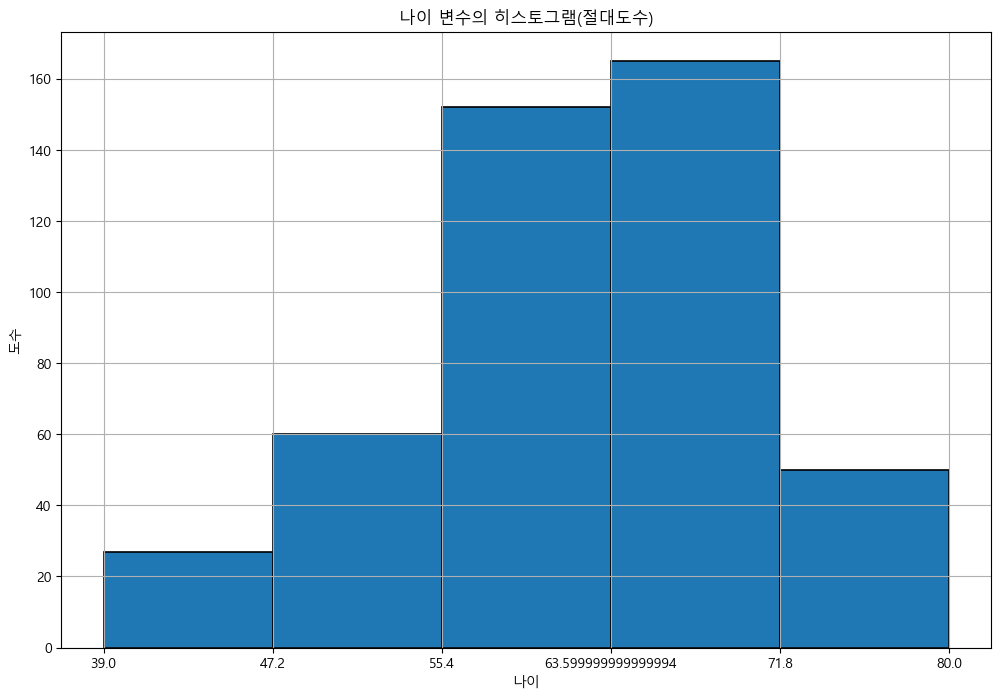

In [ ]:
## Pyplot을 활용하여 나이 칼럼에 대한 히스토그램

hist,bins = np.histogram(df['나이'],bins=5)
plt.figure()
plt.title("나이 변수의 히스토그램(절대도수)")
plt.grid()
plt.hist(df['나이'],bins=5,edgecolor='black',linewidth=1.2)
plt.xticks(bins,bins)
plt.xlabel("나이")
plt.ylabel("도수")
plt.show()
plt.close()

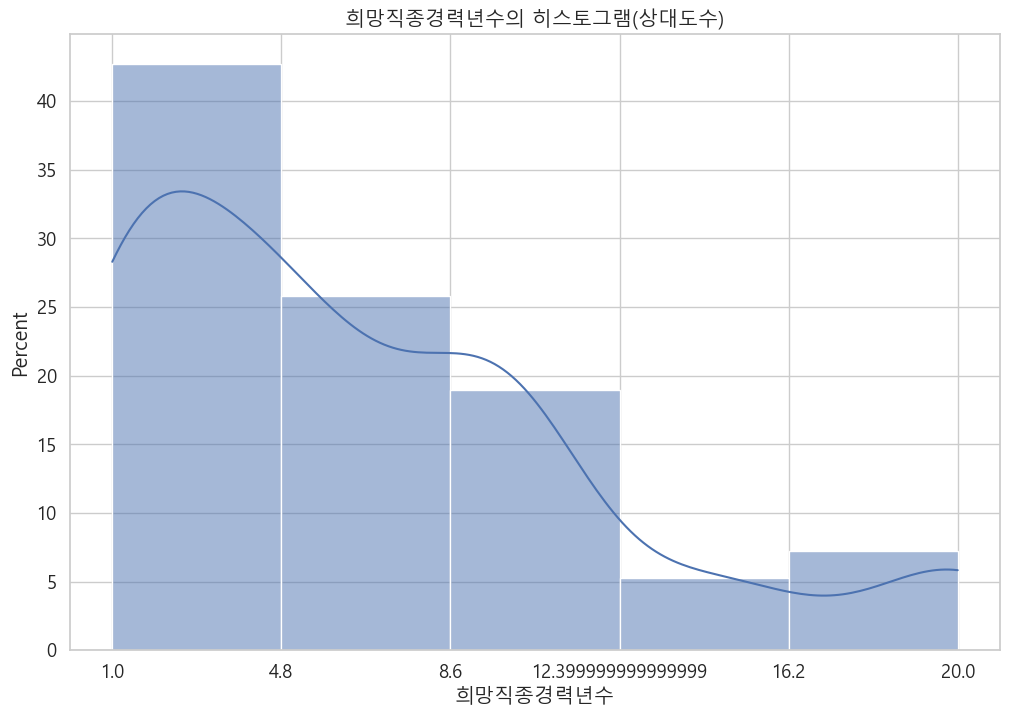

In [ ]:
# seaborn을 활용하여 경력 개월수에 대한 히스토그램 작성 - 상대도수표시 + 확률밀도곡선 표시 

hist,bins = np.histogram(df.loc[df['희망직종경력유무']=="경력",'희망직종경력년수'],bins=5)

plt.figure()
sb.set_theme(style="whitegrid",font='Malgun Gothic',font_scale=1.2)
sb.histplot(data=df[df['희망직종경력유무']=="경력"],x="희망직종경력년수",bins=5,kde=True,stat="percent")
plt.xticks(bins,bins)
plt.title("희망직종경력년수의 히스토그램(상대도수)")
plt.show()
plt.close()

### 1. Matplotloib 사용한 시각화

In [69]:
## 성별에 따른 경력유무 빈도수 데이터 추출
count_df = pd.crosstab(index=df['성별'],columns=df['희망직종경력유무'],colnames=['경력유무'],rownames=['성별'])

count_df


경력유무,경력,신입
성별,,
남,99,108
여,179,98


In [68]:
## 학력에 따른 빈도수 추출
school_df = pd.DataFrame(df.value_counts("학력공통코드명"))
school_df = school_df.reset_index()
school_df


,학력공통코드명,count
0,고등학교,220
1,중학교,103
2,대학_대학교,71
3,초등학교,40
4,전문대학,28
5,관계없음,12
6,석사과정,5
7,무학력,4
8,박사과정,1


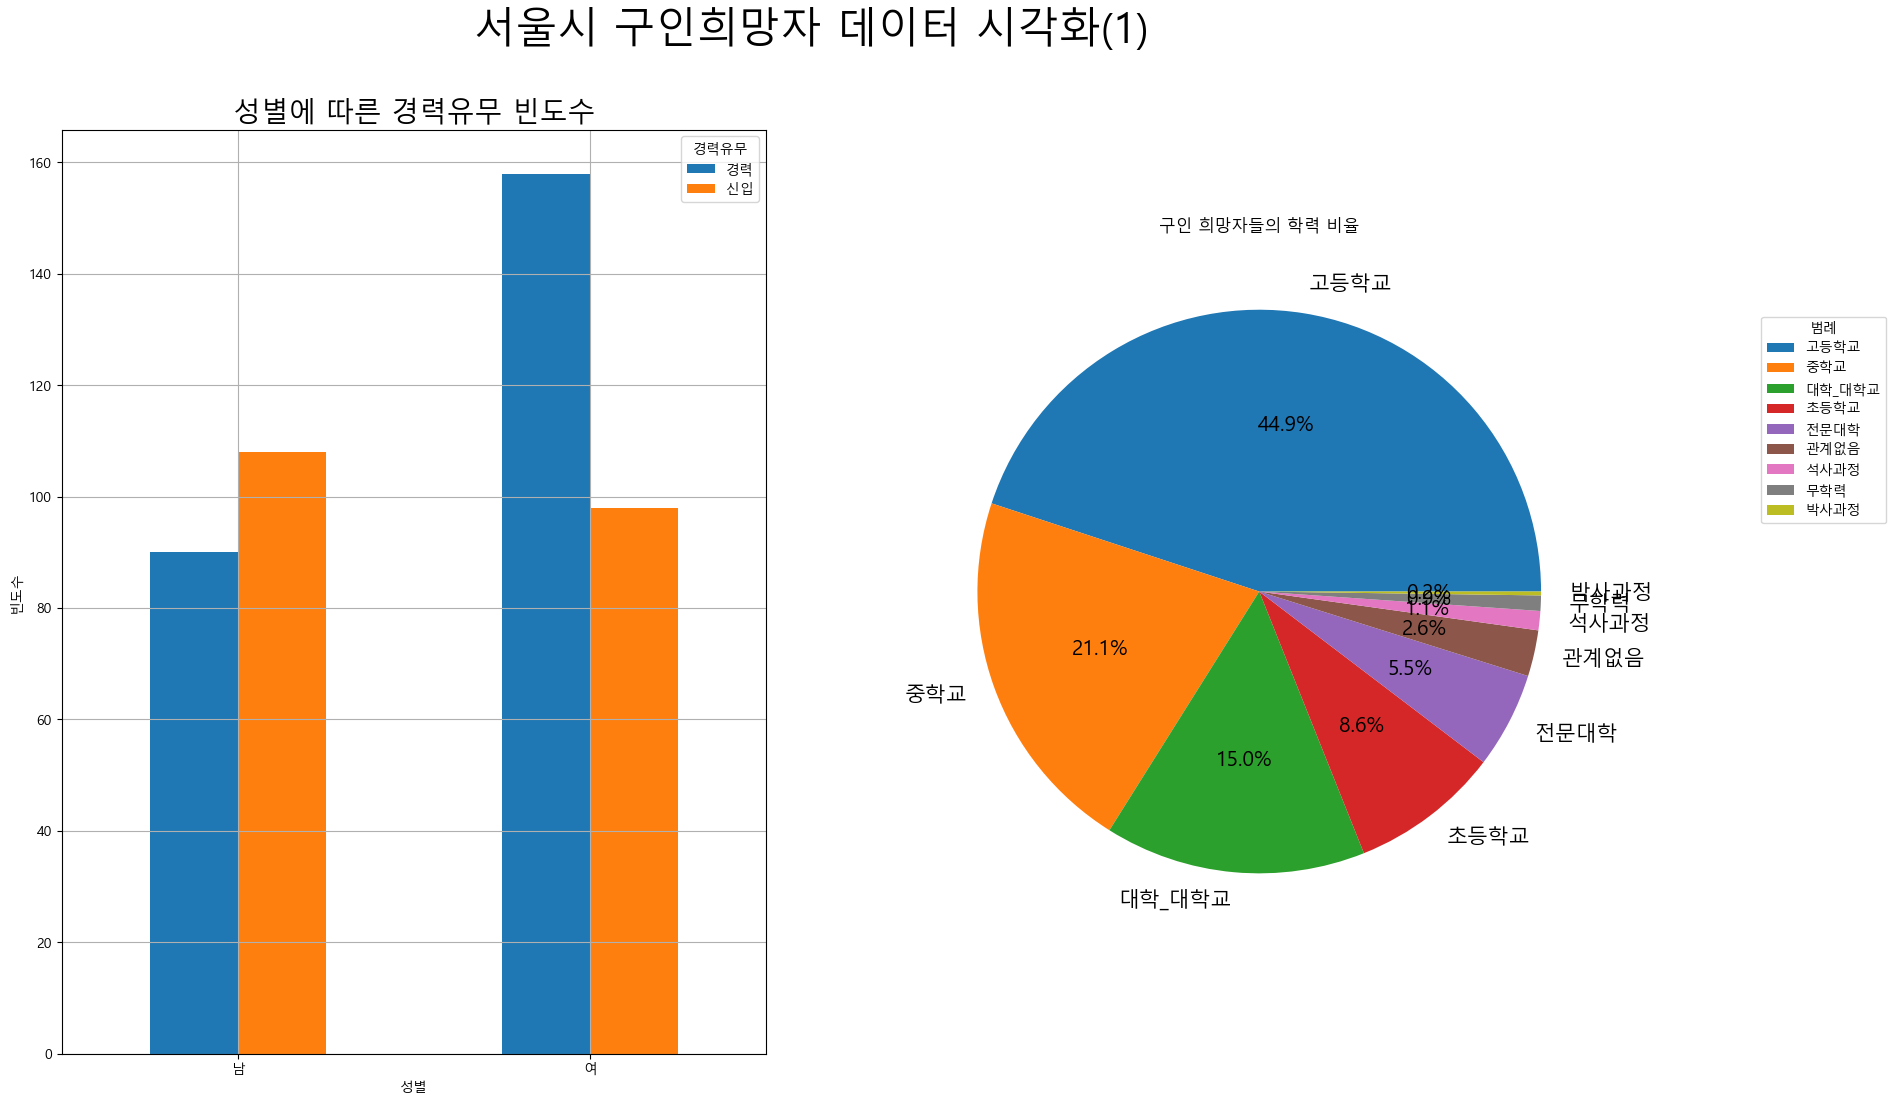

In [34]:

fig,ax = plt.subplots(1,2,figsize=(20,12))

## 데이터프레임을 기반으로 각 영역에 그래프 종류별 표시

## 전체 제목 

fig.suptitle("서울시 구인희망자 데이터 시각화(1)",fontsize=30)

## 각 그래프간의 가로 세로 간격 지정
fig.subplots_adjust(wspace=0.2,hspace=0.3)
#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 성별에따른 경력유무의 빈도수에 대한 그래프
#--------------------------------------------------------------

## 그래프 작성
count_df.plot.bar(ax=ax[0],rot=0)
ax[0].grid()
ax[0].set_title('성별에 따른 경력유무 빈도수',fontsize=20)
ax[0].set(xlabel= "성별",ylabel="빈도수")

#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 학력에 따른 파이차트
#--------------------------------------------------------------

## 그래프 작성
school_df['count'].plot.pie(labels = school_df['학력공통코드명'], autopct="%0.1f%%",ax=ax[1],fontsize=15)
ax[1].set_title("구인 희망자들의 학력 비율")
ax[1].legend(labels=school_df['학력공통코드명'],title='범례',bbox_to_anchor=(1.4,0.9))
ax[1].set(ylabel=None)

plt.show()
plt.close()

### 2. Seaborn을 이용한 시각화

In [130]:
df.head(5)

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수,희망직종경력(범주화)
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0,0~10년이하
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0,0~10년이하
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0,0~10년이하
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0,0~10년이하
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0,0~10년이하


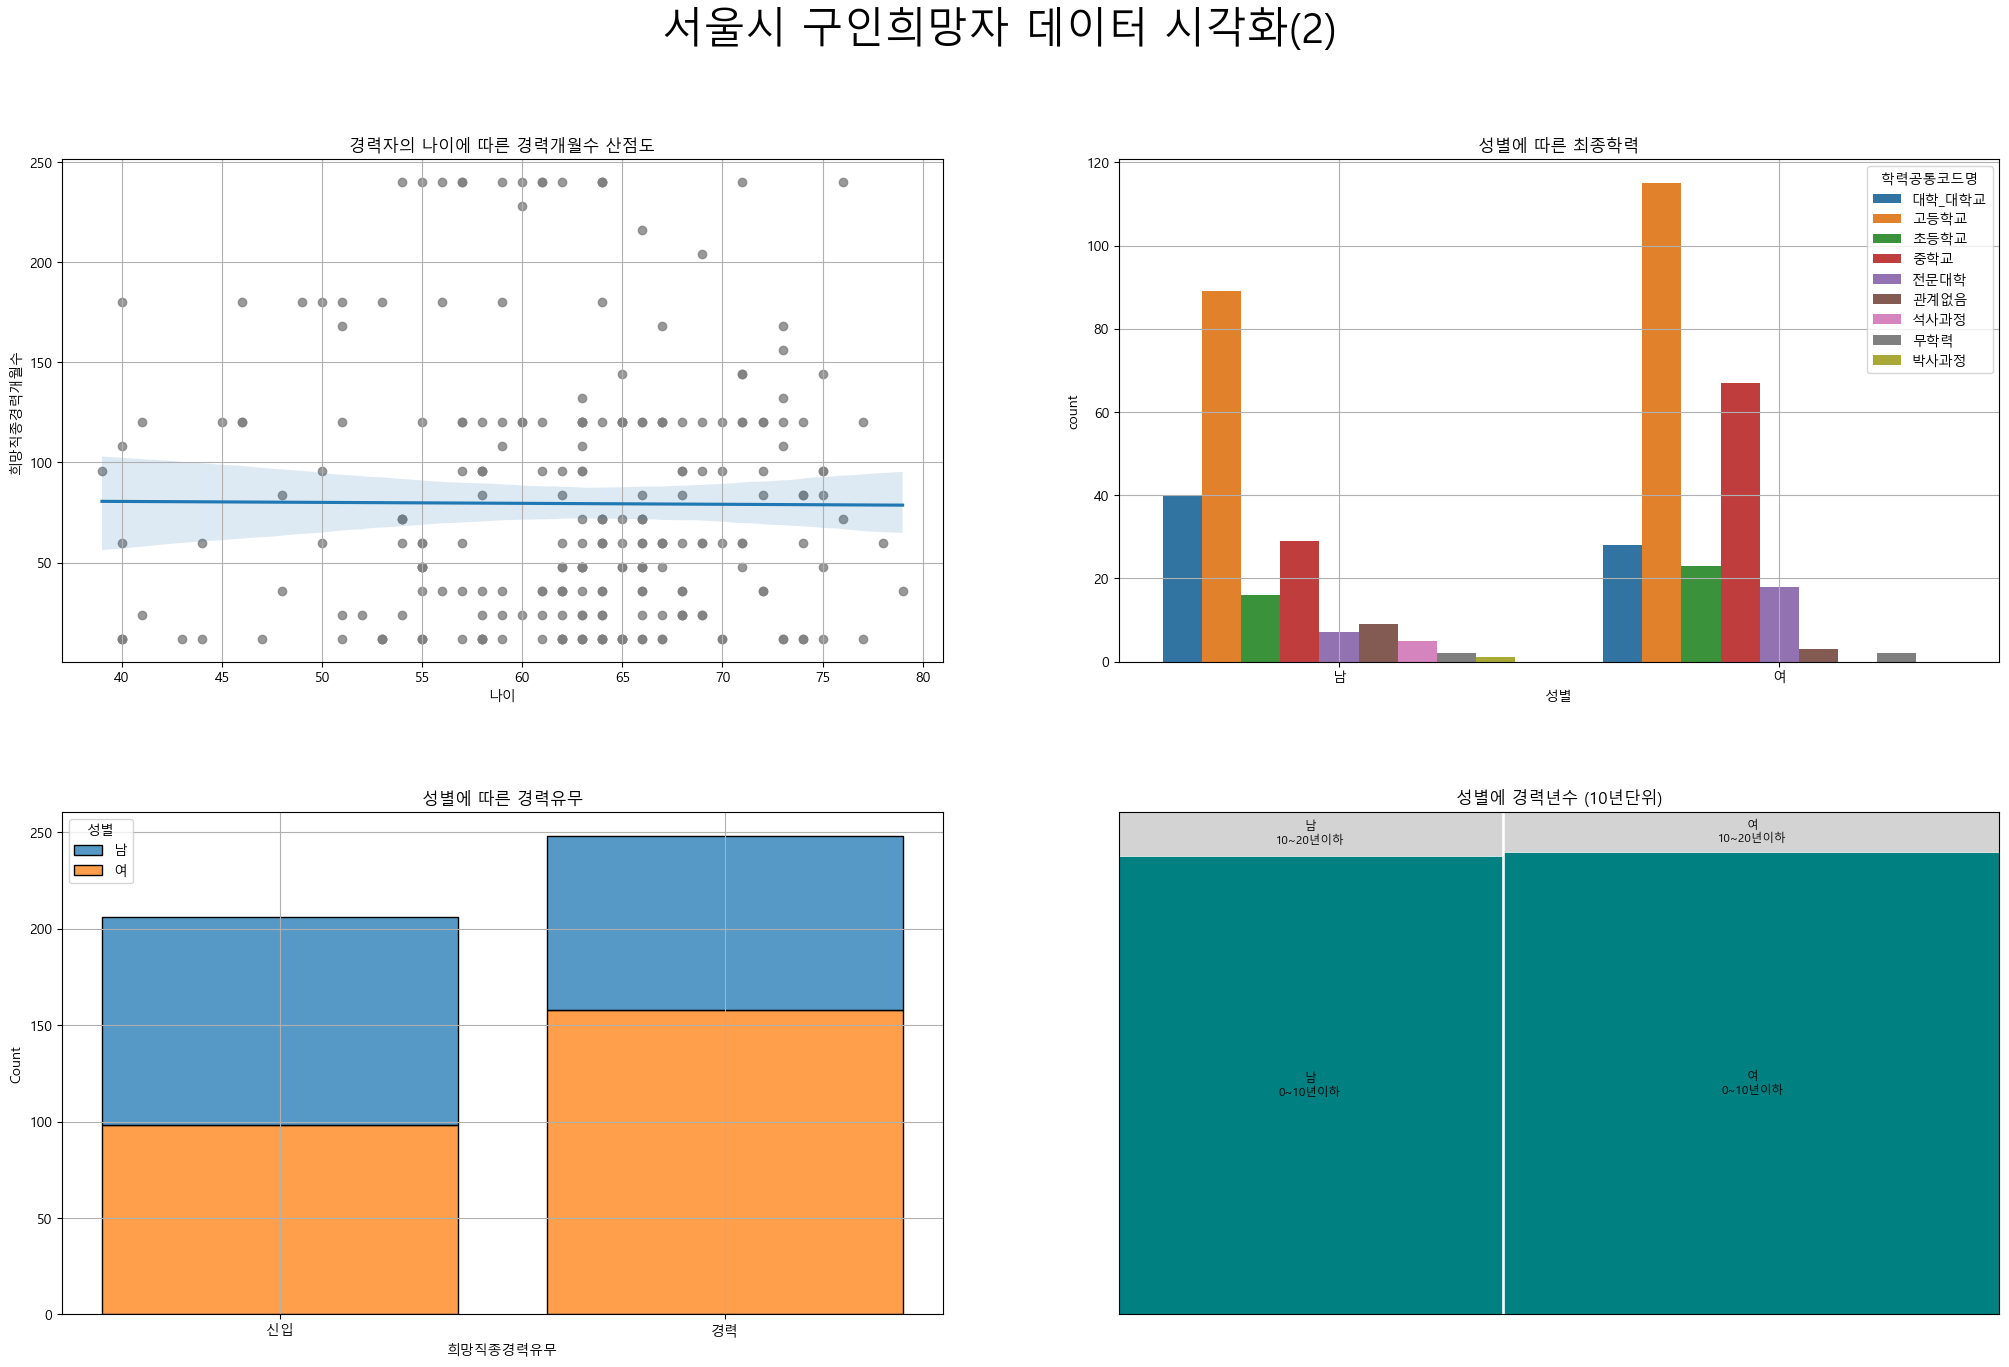

In [36]:

fig,ax = plt.subplots(2,2,figsize=(25,15))
## 데이터프레임을 기반으로 각 영역에 그래프 종류별 표시

## 전체 제목 ## x축을 나이로 둬도 되지않나

fig.suptitle("서울시 구인희망자 데이터 시각화(2)",fontsize=30)

## 각 그래프간의 가로 세로 간격 지정
fig.subplots_adjust(wspace=0.2,hspace=0.3)
#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 경력자의 나이에 따른 희망직종경력개월수 산점도
#--------------------------------------------------------------

sb.regplot(data=df[df['희망직종경력유무']=="경력"],x='나이',y="희망직종경력개월수",
            scatter_kws={"color":"grey"}, label = "경력개월수",ax=ax[0][0])
ax[0][0].set_title("경력자의 나이에 따른 경력개월수 산점도")
ax[0][0].grid()
#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 성별에 따른 최종학력 막대그래프
#--------------------------------------------------------------

### 빈도수 계산을 위한 교차표 작성

sb.countplot(data =df , x="성별",hue='학력공통코드명',ax=ax[0][1])
ax[0][1].set_title("성별에 따른 최종학력")
ax[0][1].grid()

#--------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 성별에 따른 경력 유무 누적 막대그래프 
#--------------------------------------------------------------

sb.histplot(data= df ,x='희망직종경력유무',hue='성별',multiple='stack',shrink=.8,ax=ax[1][0])
ax[1][0].set_title("성별에 따른 경력유무")
ax[1][0].grid()
#--------------------------------------------------------------
# 네 번째 영역 그래프 표시 -> 전체 구인희망자들의 성별에 따른 경력년수(10년단위)
#--------------------------------------------------------------

## 색깔 호출하는 함수 작성
def getColor(key):
    if "0~10년이하" in key :
        color = "teal"
    elif "10~20년이하" in key :
        color = "lightgray"
    else :
        color="skyblue"
    return {"color":color}
## 그래프 작성
mosaic(df,["성별",'희망직종경력(범주화)'], axes_label=False,ax=ax[1][1],
        properties= getColor)
ax[1][1].set_title("성별에 경력년수 (10년단위)")

plt.show()
plt.close()


Text(0.5, 1.0, '경력년수(10년단위)에 따른 최종학력')

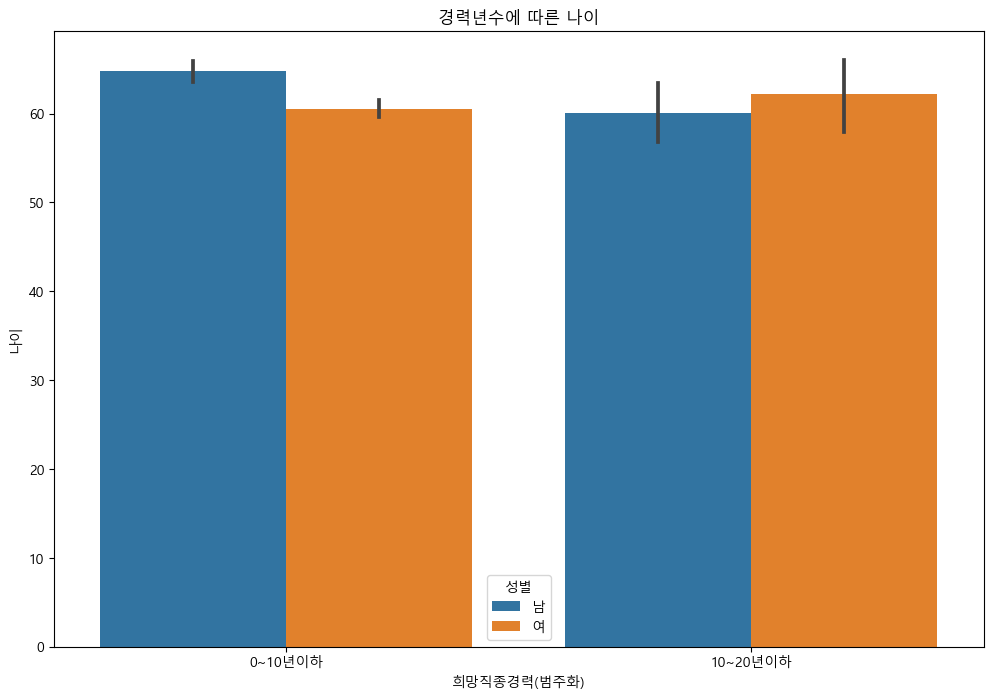

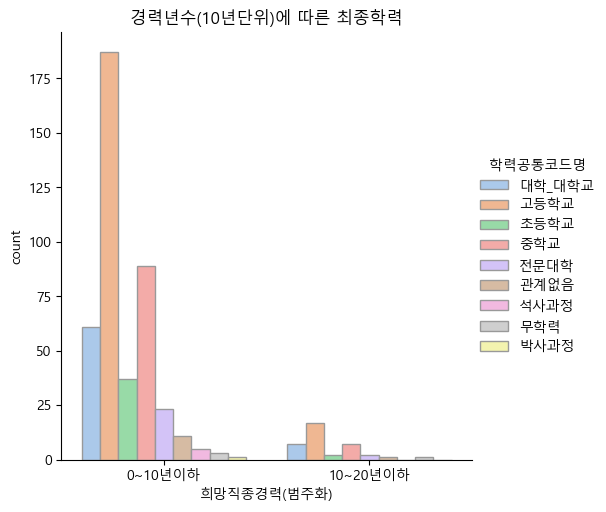

In [37]:
#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 경력년수(10년단위)와 성별에 따른 평균나이
# #--------------------------------------------------------------

sb.barplot(x='희망직종경력(범주화)', y='나이', estimator="mean", hue="성별",data=df)
plt.title("경력년수에 따른 나이")

#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 경력년수(10년)에 따른 최종학력
# #--------------------------------------------------------------
sb.catplot(data=df,x="희망직종경력(범주화)",hue="학력공통코드명",kind = "count",palette='pastel'
,edgecolor='.6')
plt.title("경력년수(10년단위)에 따른 최종학력")

## #07. 지도시각화
- 서울시 내의 구직희망자들의 지역구에 따른 분포를 확인

In [41]:
## 데이터 확인
df.head()

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수,희망직종경력(범주화)
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0,0~10년이하
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0,0~10년이하
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0,0~10년이하
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0,0~10년이하
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0,0~10년이하


### 1. 지도 이미지 가져오기


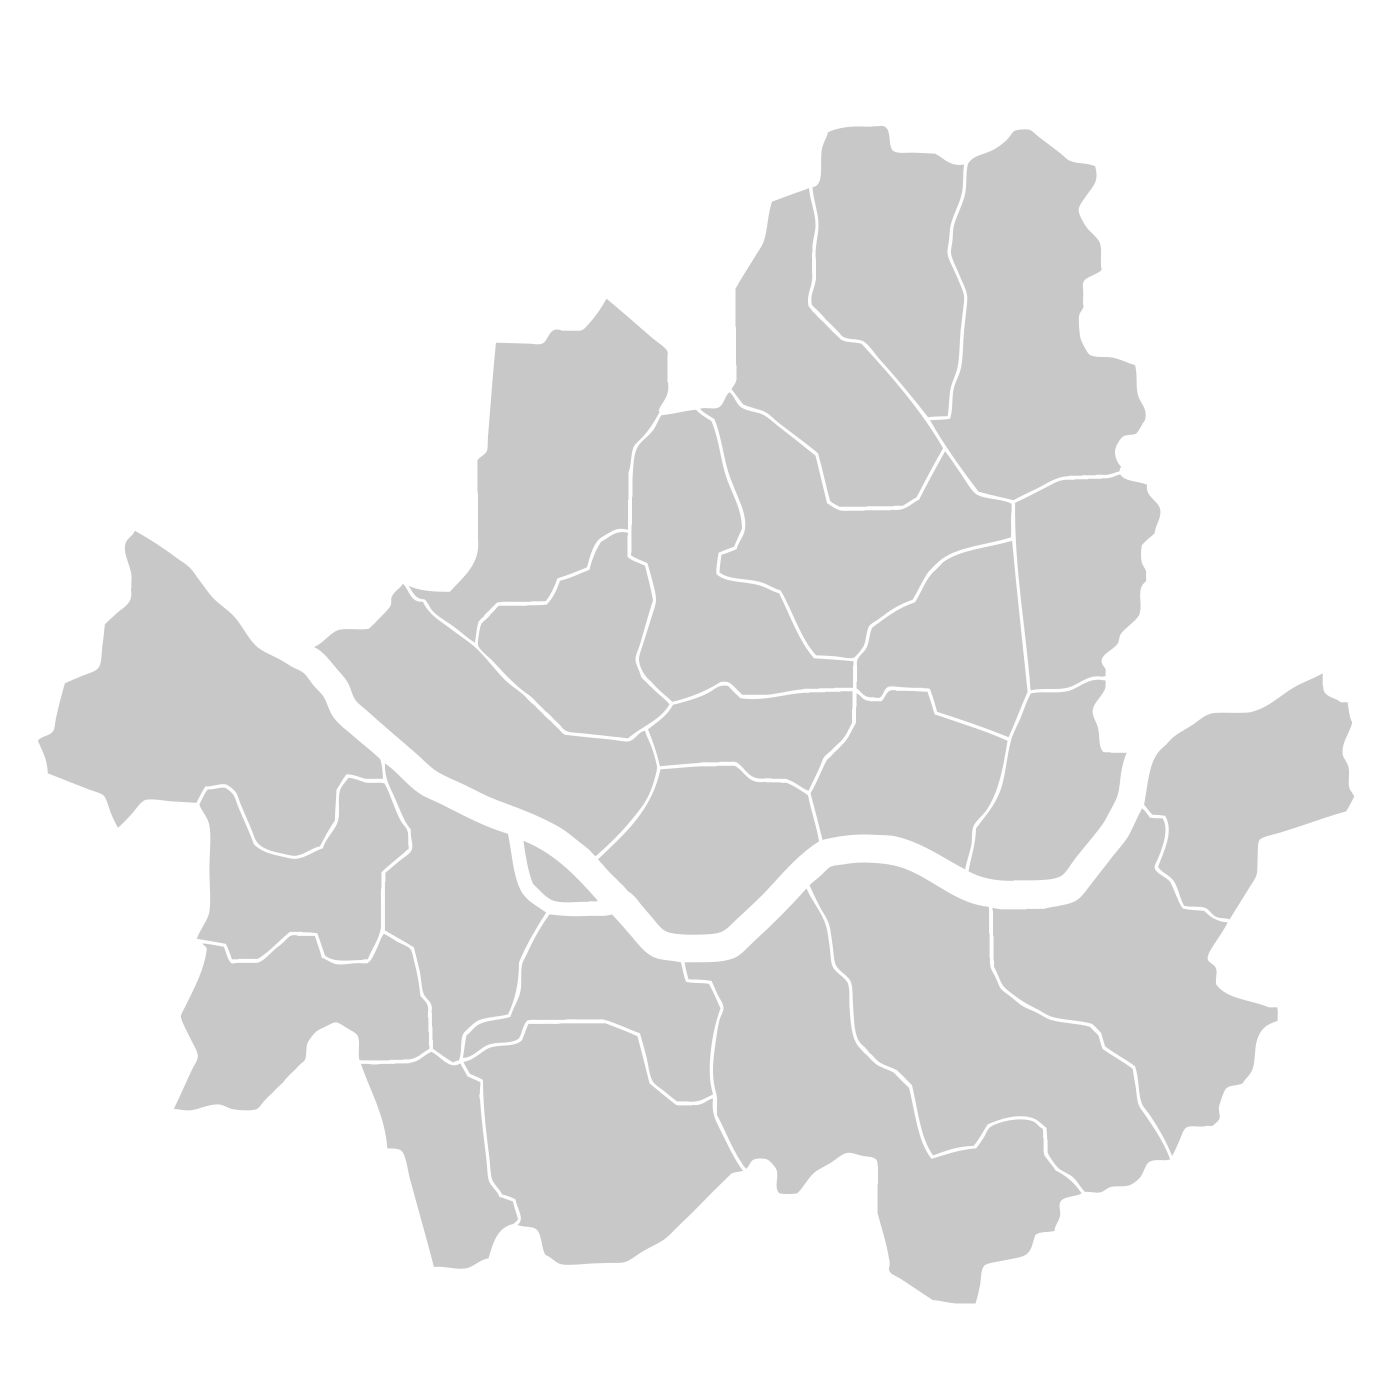

In [120]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
header_info = {'User-agent': user_agent, 'referer': None}

r = requests.get('https://data.hossam.kr/D04/map_seoul.svg', headers=header_info)

# 결과 검사
if r.status_code != 200:
    # 에러코드와 에러메시지를 문자열로 구성
    err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
    # 강제로 에러를 발생시킨다.
    raise Exception(err_msg)

map_svg = r.text
SVG(map_svg)

### 2. 지도 이미지 파싱


In [121]:
soup = BeautifulSoup(map_svg)
soup
## path 태그 추출 필요

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="utf-8"?><!-- Generator: Adobe Illustrator 15.1.0, SVG Export Plug-In . SVG Version: 6.00 Build 0)  --><!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<html><body><svg enable-background="new 0 0 1400 1400" height="1400px" id="Layer_1" version="1.1" viewbox="0 0 1400 1400" width="1400px" x="0px" xml:space="preserve" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" y="0px">
<path clip-rule="evenodd" d="M964.064,164.667
	c-1.447,9.018-0.285,18.105-2.002,27.506c-2.068,11.332-9.018,22.101-11.502,33.507c-0.867,3.979-0.977,9.201-1.5,14.003
	c-0.508,4.656-1.969,10.129-1.5,14.003c0.779,6.456,5.756,14.04,8.502,21.005c2.287,5.805,7.385,15.948,8.002,21.505
	c0.539,4.856-0.953,11.628-1.502,17.504c-0.547,5.879-1.484,11.904-2,17.504c-1.135,12.346-0.799,25.368-3,36.008
	c-1.582,7.641-5.57,14.402-7.002,21.505c-1.725,8.558-1.271,18.438-3,27.506c-6.813,0.022-13.387,0.283-19.506,1
	c-14.793-19.111-

#### 구단위로 추출 
-> 색깔은 fill="#C8C8C8" 구이름은 id="Yongsan-gu"

-> id 속성을 갖는 path태그 가져오기

In [122]:
path_list = soup.select("path[id]")

path_list

[<path clip-rule="evenodd" d="M964.064,164.667
 	c-1.447,9.018-0.285,18.105-2.002,27.506c-2.068,11.332-9.018,22.101-11.502,33.507c-0.867,3.979-0.977,9.201-1.5,14.003
 	c-0.508,4.656-1.969,10.129-1.5,14.003c0.779,6.456,5.756,14.04,8.502,21.005c2.287,5.805,7.385,15.948,8.002,21.505
 	c0.539,4.856-0.953,11.628-1.502,17.504c-0.547,5.879-1.484,11.904-2,17.504c-1.135,12.346-0.799,25.368-3,36.008
 	c-1.582,7.641-5.57,14.402-7.002,21.505c-1.725,8.558-1.271,18.438-3,27.506c-6.813,0.022-13.387,0.283-19.506,1
 	c-14.793-19.111-31.705-39.509-48.51-58.013c-4.902-5.398-11.217-16.078-17.504-18.504c-7.016-2.707-17.623,0.042-22.006-7.001
 	c-4.459-4.876-9.127-9.544-14.002-14.003c-0.148-1.02-1.354-0.98-1.502-2c-3.959-4.376-8.127-8.544-12.502-12.503
 	c-2.484-9.723,2.434-16.186,3.5-24.005c1.156-1.678,0.176-5.493,0.5-8.001c0-4.168,0-8.335,0-12.503
 	c-1.914-13.504,2.932-25.383,2.502-37.009c-0.459-12.384-5.236-23.798-6.002-36.508c11.756-1.325,7.563-21.182,9.002-35.508
 	c0.838-8.333,5.449-13.907,6.502-19.5

### 3. 데이터 전처리 
> 파싱한 id의 구이름은 영어 , 데이터프레임 내의 구이름은 한글이기 때문에 변환시켜야함


> 희망근무지역이 서울 전체인 경우 전체 구에 대해서 그 수만큼 더해주고 서울 전체인 경우를 제거한다.

In [123]:
## 구 별 구직희망자들을 집계하고 구직 희망지역이 서울시 전체인경울 처리
count_df = pd.DataFrame(df['희망근무지역명(시군구)_1'].value_counts())

count_df = count_df +4
count_df = count_df.iloc[:-1,].reset_index()
count_df


,희망근무지역명(시군구)_1,count
0,구로구,33
1,송파구,31
2,강동구,29
3,강서구,27
4,관악구,27
5,중랑구,26
6,동대문구,26
7,서대문구,26
8,양천구,26
9,도봉구,24


In [124]:
## 파싱결과에서의 구단위 값
for p in path_list :
    print(p['id'])

Dobong-gu
Dongdaemun-gu
Dongjak-gu
Eunpyeong-gu
Gangbuk-gu
Gangdong-gu
Gangseo-gu
Geumcheon-gu
Guro-gu
Gwanak-gu
Gwangjin-gu
Gangnam-gu
Jongno-gu
Jung-gu
Jungnang-gu
Mapo-gu
Nowon-gu
Seocho-gu
Seodaemun-gu
Seongbuk-gu
Seongdong-gu
Songpa-gu
Yangcheon-gu
Yeongdeungpo-gu
Yongsan-gu


In [125]:
## 데이터 전처리 
count_df.loc[count_df['희망근무지역명(시군구)_1']=='강남구',"희망근무지역명(시군구)_1"]="Gangnam-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='강동구',"희망근무지역명(시군구)_1"]="Gangdong-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='강북구',"희망근무지역명(시군구)_1"]="Gangbuk-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='강서구',"희망근무지역명(시군구)_1"]="Gangseo-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='관악구',"희망근무지역명(시군구)_1"]="Gwanak-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='광진구',"희망근무지역명(시군구)_1"]="Gwangjin-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='구로구',"희망근무지역명(시군구)_1"]="Guro-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='금천구',"희망근무지역명(시군구)_1"]="Geumcheon-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='노원구',"희망근무지역명(시군구)_1"]="Nowon-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='도봉구',"희망근무지역명(시군구)_1"]="Dobong-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='동대문구',"희망근무지역명(시군구)_1"]="Dongdaemun-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='동작구',"희망근무지역명(시군구)_1"]="Dongjak-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='마포구',"희망근무지역명(시군구)_1"]="Mapo-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='서대문구',"희망근무지역명(시군구)_1"]="Seodaemun-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='서초구',"희망근무지역명(시군구)_1"]="Seocho-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='성동구',"희망근무지역명(시군구)_1"]="Seongdong-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='성북구',"희망근무지역명(시군구)_1"]="Seongbuk-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='송파구',"희망근무지역명(시군구)_1"]="Songpa-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='양천구',"희망근무지역명(시군구)_1"]="Yangcheon-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='영등포구',"희망근무지역명(시군구)_1"]="Yeongdeungpo-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='용산구',"희망근무지역명(시군구)_1"]="Yongsan-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='은평구',"희망근무지역명(시군구)_1"]="Eunpyeong-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='종로구',"희망근무지역명(시군구)_1"]="Jongno-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='중구',"희망근무지역명(시군구)_1"]="Jung-gu"
count_df.loc[count_df['희망근무지역명(시군구)_1']=='중랑구',"희망근무지역명(시군구)_1"]="Jungnang-gu"

count_df

,희망근무지역명(시군구)_1,count
0,Guro-gu,33
1,Songpa-gu,31
2,Gangdong-gu,29
3,Gangseo-gu,27
4,Gwanak-gu,27
5,Jungnang-gu,26
6,Dongdaemun-gu,26
7,Seodaemun-gu,26
8,Yangcheon-gu,26
9,Dobong-gu,24


In [126]:
## 데이터프레임에 색상값 추가하기 위해 칼럼추가
count_df['색상값'] = None

## 색상값 추가
colors = ["#f7f9fa","#d0eaf7","#a6dcf7","#7fcef5","#4cc2fc","#07a7f5","#077cb5"]
## 색상값은 0~5, 5~10, 10~15, 15~20,20~25,25~30,30~35
for p in path_list :
    # print(p)
    region = p['id']
    # print(region)
    count = count_df.loc[count_df['희망근무지역명(시군구)_1']==region,'count']
    # print(count)
    # print(count.iloc[0])
    if count.iloc[0] >=30 : color_index = 6
    elif count.iloc[0] >=25 : color_index = 5
    elif count.iloc[0] >=20 : color_index = 4
    elif count.iloc[0] >=15 : color_index = 3 
    elif count.iloc[0] >=10 : color_index = 2
    elif count.iloc[0] >= 5 : color_index = 1
    else : color_index = 0
    count_df.loc[count_df['희망근무지역명(시군구)_1']==region,'색상값'] = colors[color_index]
    p["fill"] = colors[color_index]
count_df

,희망근무지역명(시군구)_1,count,색상값
0,Guro-gu,33,#077cb5
1,Songpa-gu,31,#077cb5
2,Gangdong-gu,29,#07a7f5
3,Gangseo-gu,27,#07a7f5
4,Gwanak-gu,27,#07a7f5
5,Jungnang-gu,26,#07a7f5
6,Dongdaemun-gu,26,#07a7f5
7,Seodaemun-gu,26,#07a7f5
8,Yangcheon-gu,26,#07a7f5
9,Dobong-gu,24,#4cc2fc


### 4. 데이터 시각화
#### 재구성된 내용을 토대로 새로우 svg 소스코드 얻기


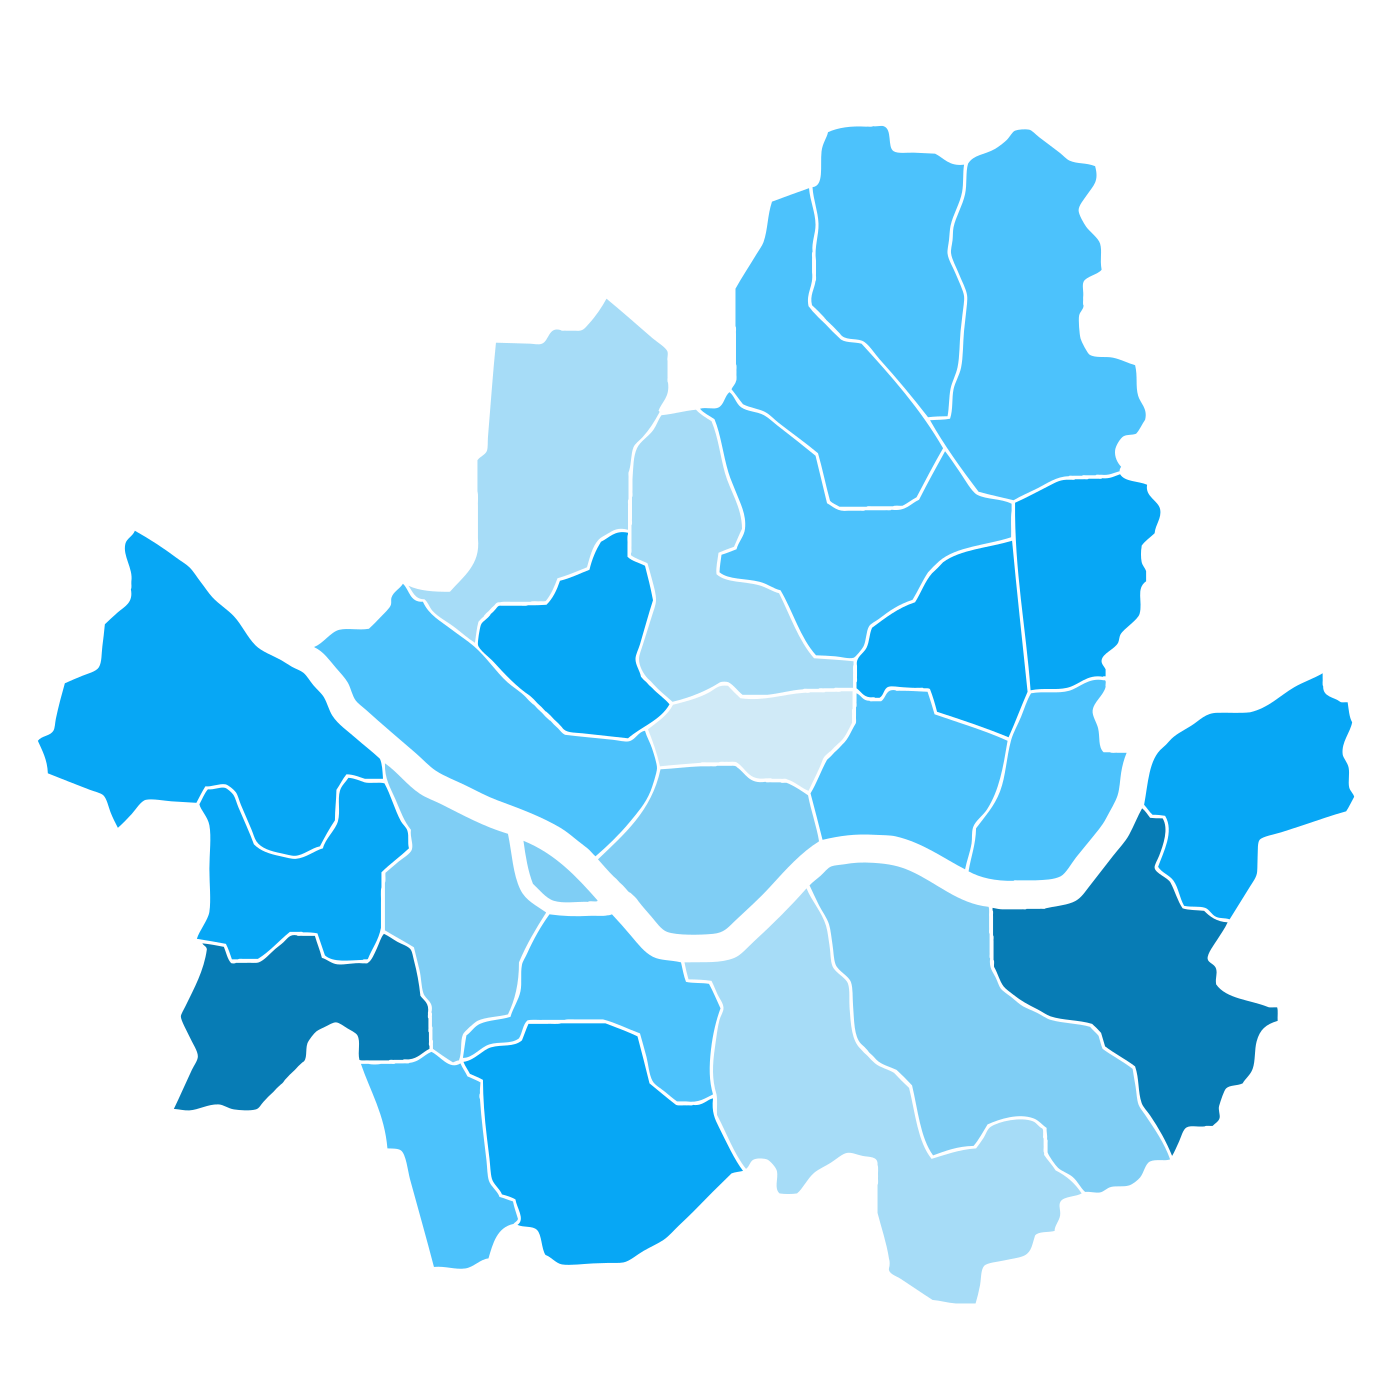

In [127]:
new_seoul_svg = soup.prettify()
SVG(new_seoul_svg)

In [94]:
## 결론
